# Left, Right, Gender

## Supplemental Material -- Post-Survey

### Library Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms, pyplot
import os
import json
import ast
import matplotlib.cm as cm
from matplotlib.patches import Rectangle, Circle
from matplotlib.patches import Patch
from matplotlib.legend import Legend
from matplotlib.lines import Line2D
from scipy.stats import kurtosis, skew
pd.set_option('display.max_rows', 500)
from datetime import datetime
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from scipy.stats import f_oneway

### Constants

In [2]:
experiment_modes = ["CTRL", "SUM", "RT", "RTSUM"] # AYS == CTRL
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4']
hatches = ["\\\\", "o", "+", "*"]
meancolor = '#3498db'
mediancolor = 'red'

### Re-used methods

In [3]:
def subfigure_boxplot(df, filename, columns, by):

    meanpointprops = dict(marker='s', markeredgecolor='black', markerfacecolor=meancolor, markersize=8)
    medianlineprops = dict(linestyle='-', linewidth=3, color=mediancolor)
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    whiskerprops = dict(linestyle='-', linewidth=1, color='black')
    flierprops = dict(linestyle='-', linewidth=1, color='black')
    bp_dict = df.boxplot(by=by, 
                          whiskerprops=whiskerprops, 
                          boxprops=boxprops, 
                          vert=False, 
                          column=columns, 
                          meanprops=meanpointprops, 
                          showmeans=True, 
                          medianprops=medianlineprops,
                          layout=(8,1),
                          figsize=(2.9, 12),
                          return_type='both',
                          patch_artist = True,
                          widths=[0.7]*4
                         )

    for row_key, (ax,row) in bp_dict.iteritems():
        ax.grid(alpha=0.2, b=True)
        ax.set_xticks([1,2,3,4,5])
        ax.set_xticklabels(["1","2","3","4","5"])
        ax_title = ax.get_title()
        ax.set_ylabel(ax_title, rotation=0, labelpad=15, fontsize=14, horizontalalignment='right', verticalalignment='center')
        ax.set_xlabel('', labelpad=10, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12, length=0, pad=5)
        ax.set_title('')

        for j,s in enumerate(ax.spines):
            ax.spines[s].set_visible(False)

        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])
            box.set_hatch(hatches[i])

    stats_list = list()
    for col in columns:        
        mean_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).mean().round(2).reset_index().values.tolist():
            mean_obj = dict()
            mean_obj["experiment_mode"] = item[0]
            mean_obj["mean"] = item[1]
            mean_list.append(mean_obj)
            
        median_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).median().round(2).reset_index().values.tolist():
            median_obj = dict()
            median_obj["experiment_mode"] = item[0]
            median_obj["median"] = item[1]
            median_list.append(median_obj)

        std_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).std().round(2).reset_index().values.tolist():
            std_obj = dict()
            std_obj["experiment_mode"] = item[0]
            std_obj["std"] = item[1]
            std_list.append(std_obj)
            
        for index, obj in enumerate(std_list):
            stats_dict = dict()
            stats_dict["column"] = col
            stats_dict["experiment_mode"] = obj["experiment_mode"]
            stats_dict["mean"] = mean_list[index]["mean"]
            stats_dict["median"] = median_list[index]["median"]
            stats_dict["std"] = std_list[index]["std"]
            stats_list.append(stats_dict)
    
    df_stats = pd.DataFrame(stats_list)
    print(df_stats)

    plt.title("")
    plt.suptitle("")
    plt.subplots_adjust(wspace=None, hspace=0.3)
    plt.savefig(filename, bbox_inches = "tight")
    plt.show()

# Post-Survey-Politics

In [4]:
df_post_study_survey = pd.DataFrame()
for experiment_mode in experiment_modes:
    survey_file = f"Qualtrics/CLEAN/Post-Survey-Politics-{experiment_mode}.xlsx"
    _df = pd.read_excel(survey_file)
    _df["experiment_mode"] = experiment_mode
    df_post_study_survey = df_post_study_survey.append(_df)
    
df_post_study_survey.rename(columns={
    "LRG ID": "ID",
    "ID - Final": "PID",
    "How useful did you find the SCATTERPLOT VIEW in the interface to be? - Not at all useful:Very useful": "SCATTERPLOT VIEW",
    "How useful did you find the DETAIL VIEW in the interface to be?​​​​​​​ - Not at all useful:Very useful": "DETAIL VIEW",
    "How useful did you find the FILTER VIEW in the interface to be? - Not at all useful:Very useful": "FILTER VIEW",
    "How useful did you find the SELECTED COMMITTEE LIST in the interface to be? - Not at all useful:Very useful": "SELECTED COMMITTEE LIST",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your revised committee submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Revision",
    "How useful did you find the COLORING OF DATA POINTS in the SCATTERPLOT VIEW to be? - Not at all useful:Very useful": "IN-SITU INTERACTION TRACES",
    "How useful did you find the DISTRIBUTION PANEL in the interface to be? - Not at all useful:Very Useful": "EX-SITU INTERACTION TRACES",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your initial committee submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Initial Selection"    
}, inplace=True)

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

                                             column experiment_mode  mean  \
0                                  SCATTERPLOT VIEW            CTRL  4.08   
1                                  SCATTERPLOT VIEW              RT  4.27   
2                                  SCATTERPLOT VIEW           RTSUM  4.08   
3                                  SCATTERPLOT VIEW             SUM  4.00   
4                                       DETAIL VIEW            CTRL  3.69   
5                                       DETAIL VIEW              RT  4.73   
6                                       DETAIL VIEW           RTSUM  4.17   
7                                       DETAIL VIEW             SUM  4.57   
8                                       FILTER VIEW            CTRL  4.31   
9                                       FILTER VIEW              RT  3.73   
10                                      FILTER VIEW           RTSUM  4.00   
11                                      FILTER VIEW             SUM  3.57   

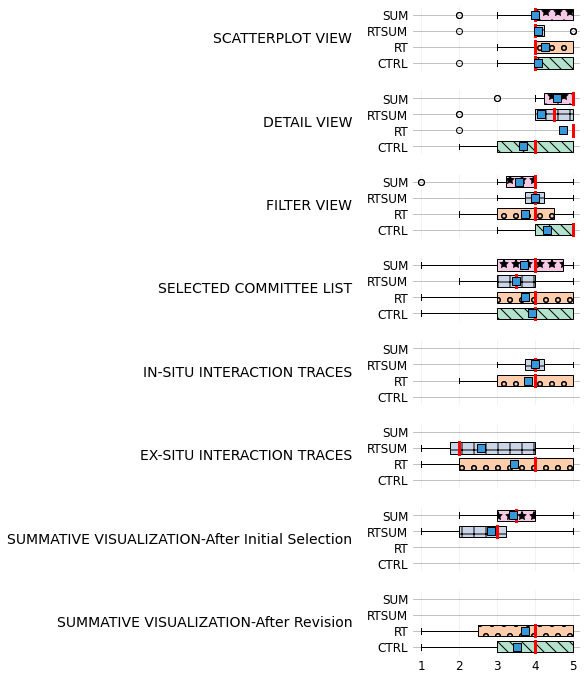

In [5]:
columns = [
    "SCATTERPLOT VIEW",
    "DETAIL VIEW",
    "FILTER VIEW",
    "SELECTED COMMITTEE LIST",
    "IN-SITU INTERACTION TRACES",
    "EX-SITU INTERACTION TRACES",
    "SUMMATIVE VISUALIZATION-After Initial Selection",
    "SUMMATIVE VISUALIZATION-After Revision",
]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/usefulness-scores-ui-features.pdf"
subfigure_boxplot(df=df_post_study_survey, 
                          by=by,
                          columns=columns, 
                          filename=filename)

# Post-Survey-Movies

In [6]:
df_post_study_survey = pd.DataFrame()
for experiment_mode in experiment_modes:
    survey_file = f"Qualtrics/CLEAN/Post-Survey-Movies-{experiment_mode}.xlsx"
    _df = pd.read_excel(survey_file)
    _df["experiment_mode"] = experiment_mode
    df_post_study_survey = df_post_study_survey.append(_df)
    
df_post_study_survey.rename(columns={
    "LRG ID": "ID",
    "ID - Final": "PID",
    "How useful did you find the SCATTERPLOT VIEW in the interface to be? - Not at all useful:Very useful": "SCATTERPLOT VIEW",
    "How useful did you find the DETAIL VIEW in the interface to be? - Not at all useful:Very useful": "DETAIL VIEW",
    "How useful did you find the FILTER VIEW in the interface to be? - Not at all useful:Very useful": "FILTER VIEW",
    "How useful did you find the SELECTED MOVIES LIST in the interface to be? - Not at all useful:Very useful": "SELECTED COMMITTEE LIST",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your revised movies submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Revision",
    "How useful did you find the COLORING OF DATA POINTS in the SCATTERPLOT VIEW to be? - Not at all useful:Very useful": "IN-SITU INTERACTION TRACES",
    "How useful did you find the DISTRIBUTION PANEL in the interface to be? - Not at all useful:Very Useful": "EX-SITU INTERACTION TRACES",
    "How useful did you find the SUMMATIVE VISUALIZATION in the interface to be after your initial movies submission? - Not at all useful:Very useful": "SUMMATIVE VISUALIZATION-After Initial Selection"    
}, inplace=True)

In [7]:
df_post_study_survey.columns

Index(['Recorded Date', 'Duration (in seconds)', 'PID', 'ID',
       'What was your criteria for selecting movies?', 'SCATTERPLOT VIEW',
       'DETAIL VIEW', 'FILTER VIEW',
       'Please choose option 5 (Very useful) for this question. - Not at all useful:Very useful',
       'SELECTED COMMITTEE LIST', 'SUMMATIVE VISUALIZATION-After Revision',
       'experiment_mode', 'SUMMATIVE VISUALIZATION-After Initial Selection',
       'IN-SITU INTERACTION TRACES', 'EX-SITU INTERACTION TRACES'],
      dtype='object')

### Usefulness scores of different Lumos views experienced by both Control and Awareness conditions'

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

                                             column experiment_mode  mean  \
0                                  SCATTERPLOT VIEW            CTRL  4.23   
1                                  SCATTERPLOT VIEW              RT  4.00   
2                                  SCATTERPLOT VIEW           RTSUM  4.25   
3                                  SCATTERPLOT VIEW             SUM  4.07   
4                                       DETAIL VIEW            CTRL  4.00   
5                                       DETAIL VIEW              RT  4.27   
6                                       DETAIL VIEW           RTSUM  3.92   
7                                       DETAIL VIEW             SUM  4.07   
8                                       FILTER VIEW            CTRL  3.69   
9                                       FILTER VIEW              RT  3.91   
10                                      FILTER VIEW           RTSUM  3.25   
11                                      FILTER VIEW             SUM  3.57   

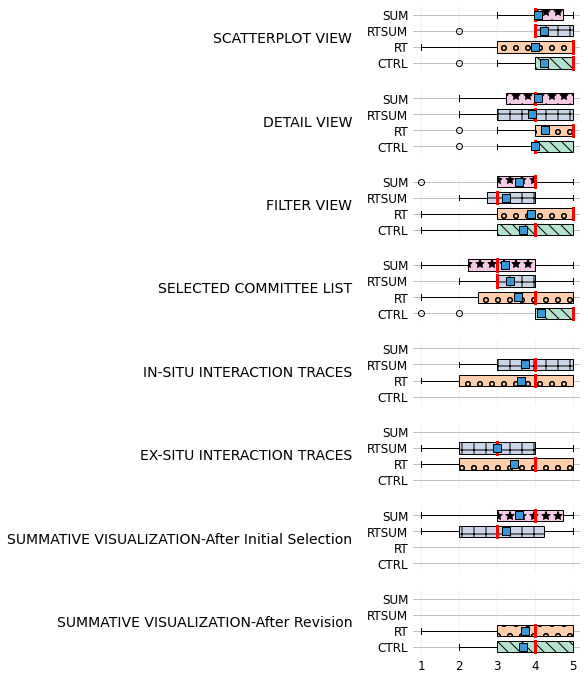

In [8]:
columns = [
    "SCATTERPLOT VIEW",
    "DETAIL VIEW",
    "FILTER VIEW",
    "SELECTED COMMITTEE LIST",
    "IN-SITU INTERACTION TRACES",
    "EX-SITU INTERACTION TRACES",
    "SUMMATIVE VISUALIZATION-After Initial Selection",
    "SUMMATIVE VISUALIZATION-After Revision",
]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/usefulness-scores-ui-features.pdf"
subfigure_boxplot(df=df_post_study_survey, 
                          by=by,
                          columns=columns, 
                          filename=filename)